## Gán hạng mục thường xuất hiện | Gán mode 

Gán là hành động thay thế dữ liệu bị khuyết bằng các ước tính thống kê về các giá trị bị khuyết. Mục tiêu của bất kỳ kỹ thuật gán nào là tạo ra một **tập dữ liệu hoàn chỉnh** có thể sử dụng để huấn luyện các mô hình học máy.

Gán mode gồm việc thay tất cả những lần xuất hiện của các giá trị bị khuyết (NA) trong một biến bằng mode, nói cách khác, nó đề cập đến **giá trị thường xuất hiện nhất** hoặc **hạng mục thường xuất hiện nhất**.



### Những biến nào có thể áp dụng gán mode?

Mặc dù mode hay giá trị thường xuất hiện nhất có thể được tính với cả biến dạng số và biến hạng mục thì trên thực tế, chúng ta chỉ sử dụng kỹ thuật này với các biến hạng mục do với các biến dạng số, mean hoặc median có xu hướng thể hiện giá trị trung bình của tập hợp tốt hơn.



### Giả định

- Dữ liệu khuyết hoàn toàn ngẫu nhiên (MCAR).
- Các quan sát bị khuyết hầu hết trông giống với đa số các quan sát trong biến (mode).

Cơ sở lý luận là giá trị được thấy cho quan sát bị khuyết rất có thể là giá trị hoặc hạng mục thường xuất hiện nhất của biến.


### Ưu điểm

- Dễ thực hiện.
- Cách nhanh chóng để có được tập dữ liệu hoàn chỉnh.
- Có thể tích hợp trong sản xuất (trong quá trình triển khai mô hình).


### Hạn chế

- Làm biến dạng quan hệ của nhãn thường xuất hiện nhất với các biến khác.
- Có thể dẫn tới biểu diễn quá mức của nhãn thường xuất hiện nhất nếu có nhiều NA.

### Khi nào thì sử dụng gán hạng mục thường xuất hiện nhất/gán mode?

- Dữ liệu bị khuyết hoàn toàn ngẫu nhiên.
- Không nhiều hơn 5% biến chứa dữ liệu bị khuyết.

## Trong bản mô phỏng này:

Chúng ta sẽ sử dụng tập dữ liệu giá nhà để biểu diễn cách thực hiện gán mode ở các biến hạng mục.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# chia các tập dữ liệu
from sklearn.model_selection import train_test_split

### Tập dữ liệu giá nhà

In [2]:
# load tập dữ liệu với một số biến để biểu diễn

# có các cột hạng mục và mục tiêu SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('./house-price/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
# kiểm tra phần trăm các giá trị bị khuyết ở từng biến

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

Biến BsmtQual chỉ chứa một số quan sát với NA (2.5); do đó, phương pháp là thay thế các quan sát đó bằng giá trị của hạng mục thường xuất hiện nhất.

Mặt khác, biến FireplaceQu chứa dữ liệu bị khuyết trong gần nửa số quan sát. Do đó, việc thay thế chúng bằng hạng mục thường xuất hiện nhất rất có thể sẽ làm sai lệch mối quan hệ của hạng mục thường xuất hiện nhất với giá bán.

Ngoài ra, nếu khuyết quá nhiều quan sát trong FireplaceQu có thể vì lý do nào đó chứ không phải ngẫu nhiên thì chúng ta nên nắm bắt điều đó bằng một kỹ thuật gán khác sẽ xuất hiện trong notebook tiếp theo. Bây giờ, hãy cùng khám phá tác động của việc thay thế NA bằng các hạng mục thường gặp nhất khi dữ liệu bị khuyết. 

### Gán quan trọng

Việc gán phải được thực hiện trong tập huấn luyện, sau đó được truyền sang tập kiểm tra. Điều này có nghĩa là hạng mục thường xuất hiện nhất phải được chọn từ tập huấn luyện và sử dụng để thay thể NA ở cả tập huấn luyện và tập kiểm tra.

In [4]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # mục tiêu
    test_size=0.3, # phần trăm các quan sát trong tập kiểm tra
    random_state=0) # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [5]:
# nhớ lại % các giá trị bị khuyết
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

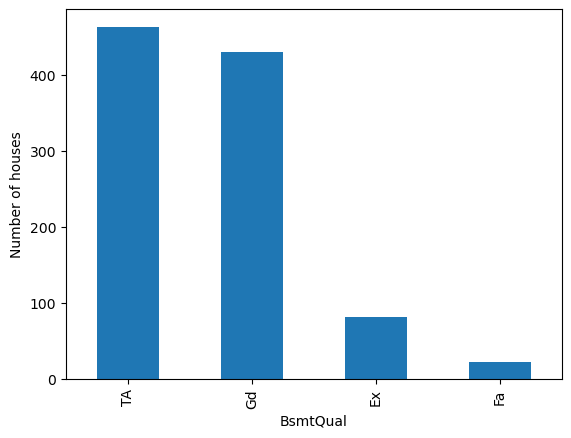

In [6]:
## Yêu cầu 1: kiểm tra số lượng quan sát trên mỗi hạng mục trong BsmtQual

# chúng ta đã sử dụng dòng code này trong phần các đặc điểm của biến

# value_counts() đếm số nhà hiển thị từng nhãn 
# trong biến được chỉ ra bên dưới

## VIẾT CODE Ở ĐÂY:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

<details><summary> Gợi ý </summary>

[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

[plot.bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

In [7]:
## Yêu cầu 2: Tìm hạng mục thường xuất hiện nhất cho BsmtQual

## VIẾT CODE Ở ĐÂY:
X_train['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

<details><summary> Gợi ý </summary>

[mode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)

</details>

Text(0.5, 1.0, 'BsmtQual')

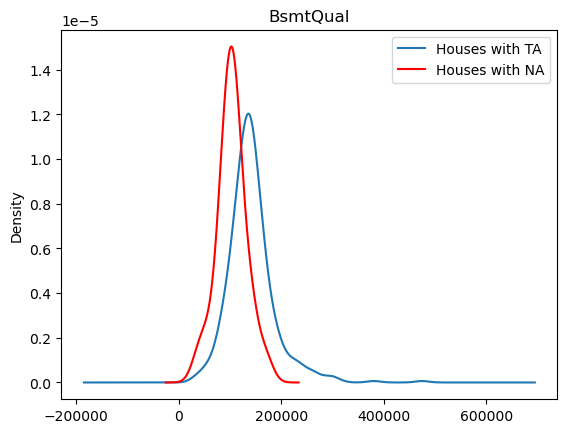

In [8]:
# vẽ biểu đồ phân phối mục tiêu cho các ngôi nhà mà:

# * hiển thị hạng mục thường xuất hiện nhất hoặc 
# * những cái hiển thị giá trị bị khuyết

fig = plt.figure()
ax = fig.add_subplot(111)

# chọn và vẽ biểu đồ các ngôi nhà với nhãn thường xuất hiện nhất
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# chọn và vẽ biểu đồ các ngôi nhà với dữ liệu bị khuyết trong biến
X_train[X_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

# thêm title
plt.title('BsmtQual')

Biểu đồ trên chỉ ra rằng những ngôi nhà với dữ liệu bị khuyết có chi phí tổng thể thấp hơn những ngôi nhà có nhãn TA. Do đó, việc thay thế các giá trị bị khuyết bằng TA có thể ảnh hưởng đến phân phối tổng thể nếu có nhiều NA.

In [9]:
# giữ phân phối ban đầu của SalePrice cho phần lớn
# hạng mục thường xuất hiện cho sau đó

# sử dụng tmp để đặt tên các biến thời gian

tmp = X_train[X_train['BsmtQual']=='TA']['SalePrice']

In [10]:
## Yêu cầu 3: điền na ở cả tập huấn luyện và tập kiểm tra

# sử dụng phương thức fillna() từ pandas

# đối số inplace=True cho pandas biết
# chúng ta muốn giá trị đã thay thế trong cùng tập dữ liệu

## VIẾT CODE Ở ĐÂY:
X_train['BsmtQual'].fillna('TA', inplace=True)
X_test['BsmtQual'].fillna('TA', inplace=True)

<details><summary> Gợi ý </summary>

[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

</details>

In [11]:
# kiểm tra xem NA đã được điền chưa

X_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Number of houses')

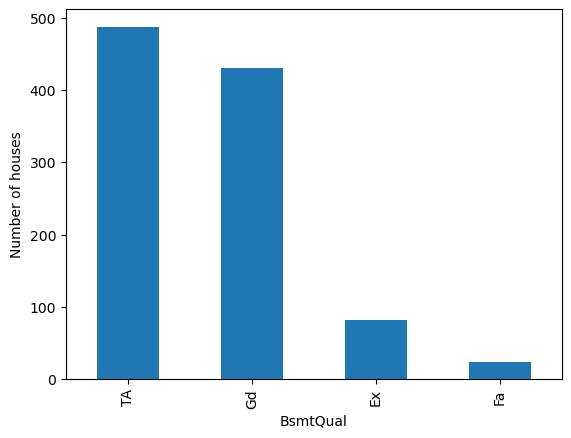

In [12]:
# đánh giá tác động với phân phối của các hạng mục

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

Từ sơ đồ trên, chúng ta thấy đã có thêm một vài ngôi nhà được dán nhãn TA, là những ngôi nhà mà trước đó có NA, nhưng không ảnh hưởng đáng kể đến phân phối. Biểu đồ trông gần như y hệt với biểu đồ trước khi gán.

Text(0.5, 1.0, 'BsmtQual')

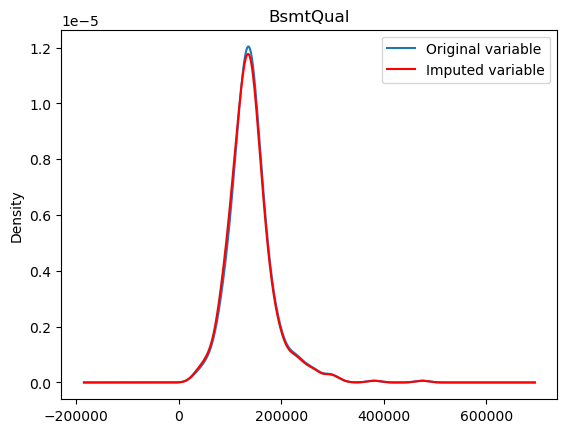

In [13]:
# phân phối của SalePrice cho hạng mục thường xuất hiện nhất có thay đổi không?
# hãy quan sát

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của SalePrice cho những ngôi nhà với nhãn thường xuất hiện nhất
# nhớ là chúng ta đã thu nạp các cell này trong notebook
tmp.plot(kind='kde', ax=ax)

# phân phối của biến sau khi gán
X_train[X_train['BsmtQual'] == 'TA']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# thêm title
plt.title('BsmtQual')

Phân phối giá nhà giữa biến ban đầu và biến đã gán khá giống nhau do có ít dữ liệu bị khuyết. Chúng ta đã dự kiến động thái này.

Hãy khám phá ảnh hưởng của gán mode khi tỷ lệ dữ liệu bị khuyết cao. 

#### FirePlaceQu

In [14]:
# nhớ lại % các giá trị bị khuyết
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

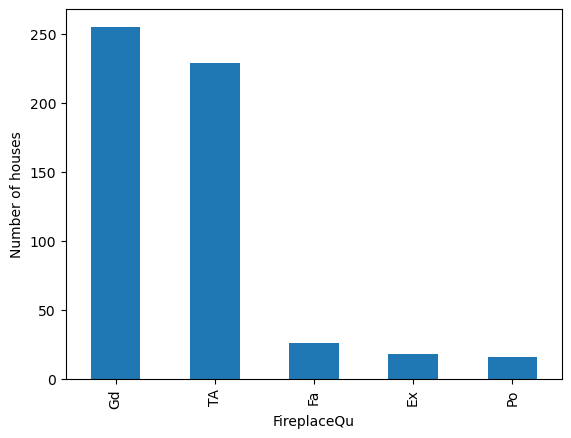

In [15]:
## Yêu cầu 4: kiểm tra số quan sát trên mỗi hạng mục

## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [16]:
## Yêu cầu 5: Tìm hạng mục thường xuất hiện nhất cho FirePlaceQu

## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FirePlaceQu')

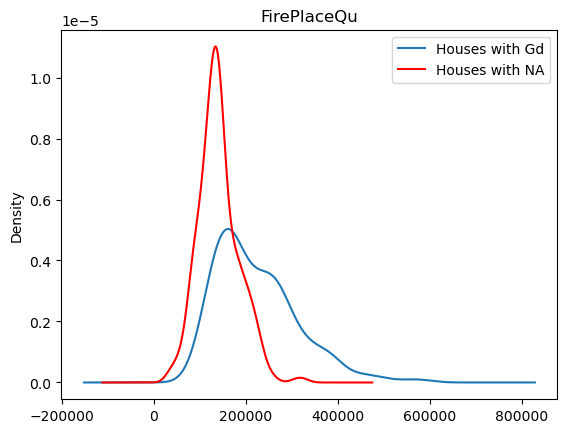

In [17]:
# vẽ biểu đồ phân phối mục tiêu cho các ngôi nhà mà:
# hiển thị hạng mục thường xuất hiện nhất và những cái hiển thị giá trị bị khuyết

fig = plt.figure()
ax = fig.add_subplot(111)

# các ngôi nhà với nhãn thường xuất hiện nhất cho FirePlaceQu
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# các ngôi nhà với giá trị bị khuyết trong FirePlaceQu
X_train[X_train['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

Các phân phối khá khác nhau, những ngôi nhà có dữ liệu bị khuyết có chi phí tổng thể thấp hơn những ngôi nhà có nhãn Gd.

In [18]:
# giữ phân phối ban đầu của SalePrice cho những ngôi nhà 
# hiển thị Gd trong FirePlaceQu, cho sau đó.

tmp = X_train[X_train['FireplaceQu']=='Gd']['SalePrice']

In [19]:
## Yêu cầu 6: điền na trong cả tập huấn luyện và tập kiểm tra

## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu'].fillna('Gd', inplace=True)
X_test['FireplaceQu'].fillna('Gd', inplace=True)

Text(0, 0.5, 'Number of houses')

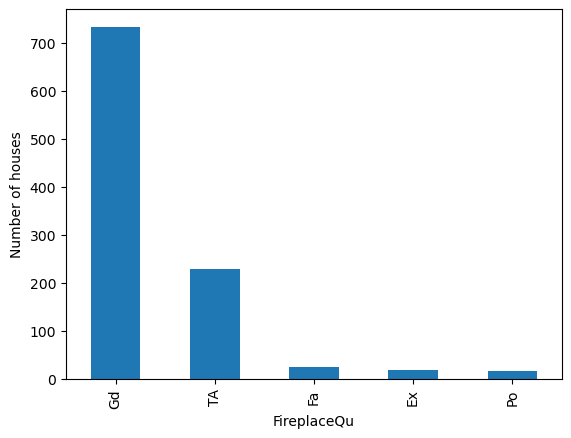

In [20]:
# kiểm tra số quanh sát trên mỗi hạng mục

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Trong trường hợp này, phân phối ban đầu của biến bị biến dạng lớn. Bây giờ chúng ta có thêm rất nhiều nhà chứa biến Gd so với các nhà hiển thị các biến khác. Ban đầu, một nửa số quan sát trong FirePlaceQu bị khuyết. Giờ thì tất cả các giá trị đó đều chứa Gd. Đó là lý do chúng ta thấy Gd tăng nhiều trong biểu đồ thanh.

Text(0.5, 1.0, 'FirePlaceQu')

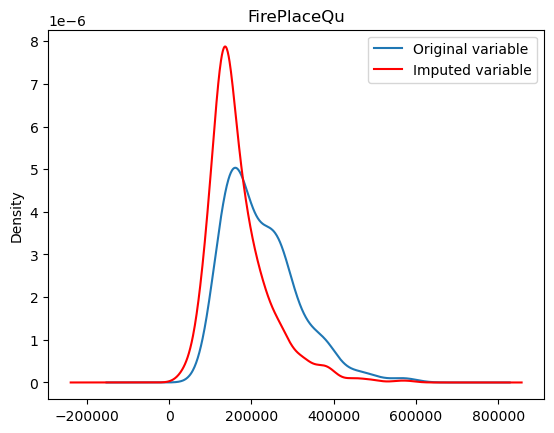

In [21]:
# vẽ biểu đồ phân phối của mục tiêu cho biến ban đầu
# và biến đã gán

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
# nhớ là chúng ta đã thu nạp các cell này trong notebook
tmp.plot(kind='kde', ax=ax)

# phân phối của biến sau khi gán
X_train[X_train['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

Giá trị nhà trung bình cho hạng mục thường xuất hiện nhất đã giảm khá nhiều sau khi thêm giá trị nhà của NA, sau khi tái phân loại NA là nhãn thường xuất hiện nhất.


Do đó, tầm quan trọng của nhãn cụ thể này với dự đoán giá nhà bị che lấp hoặc thay đổi bởi việc bổ sung các giá trị bị khuyết.

Trong những trường hợp tỷ lệ phần trăm của các giá trị bị khuyết quá cao (~50%), chúng ta nên tạo một hạng mục mới để bao hàm các quan sát với NA.